#Quarta Parte: Implementação do sistema de Machine Learning



###Importação das bibliotecas:

In [327]:
#Manipulação de Dados
import pandas as pd
import numpy as np

#Visualização de Dados
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#Sistema de Recomendação
import ast
from sklearn.feature_extraction.text import CountVectorizer

#Métricas
from sklearn.metrics.pairwise import cosine_similarity

#Deploy do Sistema de Recomendação
import pickle

###Carregando conjunto de dados:

In [328]:
df = pd.read_csv("/content/drive/MyDrive/Datascience/datasets/df_final.csv")

In [329]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

###Informação estatística:

In [331]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.353000e+03,5353.000000,5353.000000,5.353000e+03,5351.000000,5353.000000,5353.000000
mean,2.776581e+07,111178.287129,36.062382,7.710544e+07,106.528873,6.136391,713.720531
std,4.116110e+07,186090.714529,260.475179,1.596430e+08,22.269636,1.198828,1268.053435
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,9488.000000,5.251143,0.000000e+00,93.000000,5.600000,57.000000
50%,1.200000e+07,19153.000000,14.086292,1.410928e+07,103.000000,6.300000,240.000000
75%,3.700000e+07,103370.000000,30.387754,8.414683e+07,117.000000,6.900000,766.000000
max,3.800000e+08,874562.000000,13195.451000,2.787965e+09,338.000000,10.000000,13752.000000


In [332]:
df.describe(include="O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5353,2102,5353,5353,5353,5350,5353,5353,5352,5353,5353,4380,5353,5353,5353
unique,1426,2071,4651,38,5329,5340,4216,537,3566,620,3,4347,5327,5301,5318
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,F9,Dr. Lily Houghton enlists the aid of wisecrack...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Justice is coming.,F9,[],[]
freq,370,4,523,5049,2,2,359,2977,10,3171,5345,3,2,45,28


###Dicionário de Dados:

In [333]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

*   **budget**: Orçamento do Filmes em Dólares
*   **genres**: Lista de Dicionários com todos os gêneros associados ao filme
*   **homepage**: Site oficial do filme
*   **id**: Identificação (ID) do filme
*   **keywords**: Palavras chaves associadas ao filme
*   **original_language**: Idioma original do filme
*   **original_title**: Título original do filme
*   **overview**: Breve descrição do filme
*   **popularity**: Pontuação dada pelo TMDB
*   **production_companies**: Produtoras envolvidas na produção do filme
*   **release_data**: Data de Lançamento do Filme
*   **revenue**: Receita Total do filme em dólares
*   **runtime**: Tempo de execução do filme em minutos
*   **spoken_language**: Idiomas falados no filme
*   **status**: Status do filme (lançado, para ser lançado, anunciado, etc)
*   **tagline**: Tagline do filme
*   **title**: Título oficial do filme
*   **vote_average**: Avaliação média do filme
*   **vote_count**: Número de votos contabilizados pelo TMDB
*   **cast**: Elenco do filme
*   **crew**: Equipe Técnica



###Dados Faltantes:

In [334]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3251
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  973
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

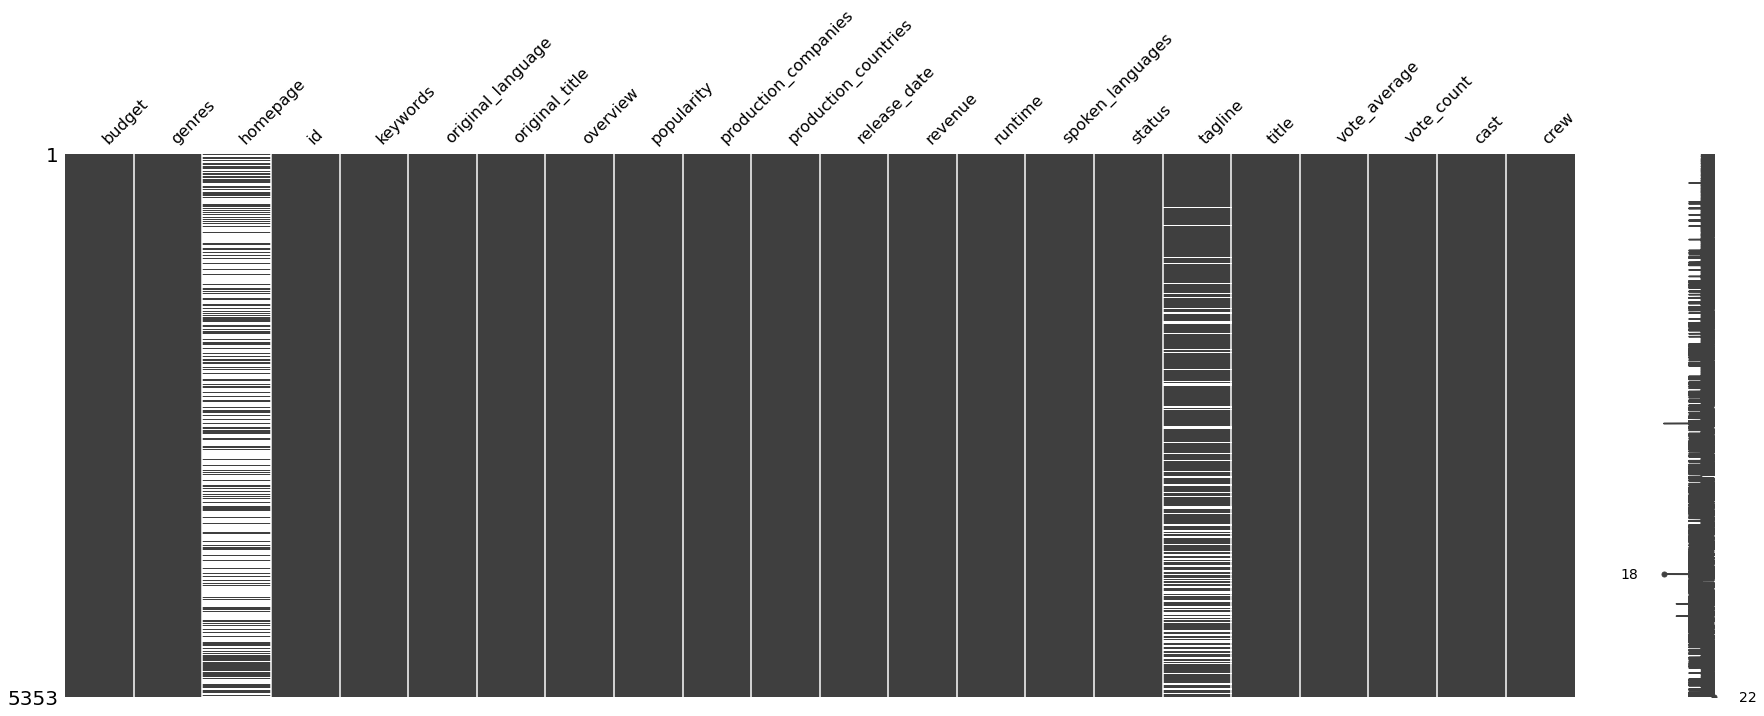

In [335]:
missingno.matrix(df, figsize=(30,10))

In [336]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [337]:
df[df.isnull().any(axis=1)].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452.0,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"[{""cast_id"": 1, ""character"": ""Prince Caspian"",...","[{""credit_id"": ""55a239e69251412979002e8b"", ""de..."
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254.0,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de..."
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833.0,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,"[{""cast_id"": 3, ""character"": ""Lieutenant Alex ...","[{""credit_id"": ""52fe469ec3a36847f8108d45"", ""de..."
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668.0,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."


In [338]:
linhas, colunas = df.shape

In [339]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

##Dados Duplicados:

In [340]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5155,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.godzillavskong.net/,399566.0,"[{'id': 11100, 'name': 'giant monster'}, {'id'...",en,Godzilla vs. Kong,"In a time when monsters walk the Earth, humani...",544.312,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-03-24,467863133,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,7.8,7532,"[{'adult': False, 'gender': 2, 'id': 28846, 'k...","[{'adult': False, 'gender': 2, 'id': 1706, 'kn..."
5201,61000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.aquietplacemovie.com,520763.0,"[{'id': 2041, 'name': 'island'}, {'id': 4305, ...",en,A Quiet Place Part II,"Following the events at home, the Abbott famil...",316.703,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-05-21,297372261,97.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Silence is not enough.,A Quiet Place Part II,7.6,3804,"[{'adult': False, 'gender': 1, 'id': 5081, 'kn...","[{'adult': False, 'gender': 1, 'id': 555, 'kno..."
5232,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://www.thefastsaga.com,385128.0,"[{'id': 3428, 'name': 'speed'}, {'id': 9663, '...",en,F9,Dominic Toretto and his crew battle the most s...,663.530,"[{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-05-19,721077945,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Justice is coming.,F9,7.4,4865,"[{'adult': False, 'gender': 2, 'id': 12835, 'k...","[{'adult': False, 'gender': 1, 'id': 2519, 'kn..."
5251,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/black-widow,497698.0,"[{'id': 470, 'name': 'spy'}, {'id': 782, 'name...",en,Black Widow,"Natasha Romanoff, also known as Black Widow, c...",581.175,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-07,378328978,134.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Her world. Her secrets. Her legacy.,Black Widow,7.5,6813,"[{'adult': False, 'gender': 1, 'id': 1245, 'kn...","[{'adult': False, 'gender': 1, 'id': 1245, 'kn..."
5272,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/jungle-cruise,451048.0,"[{'id': 10787, 'name': 'jungle'}, {'id': 15824...",en,Jungle Cruise,Dr. Lily Houghton enlists the aid of wisecrack...,576.480,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-28,217000000,127.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Jungle Cruise,7.6,3854,"[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 8221, 'kn..."
5289,110000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",https://www.20thcenturystudios.com/movies/free...,550988.0,"[{'id': 282, 'name': 'video game'}, {'id': 141...",en,Free Guy,A bank teller called Guy realizes he is a back...,818.018,"[{'id': 27711, 'logo_path': '/3e294jszfE6cE8TO...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-08-11,331096766,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Life's too short to be a background character.,Free Guy,7.7,4716,"[{'adult': False, 'gender': 2, 'id': 10859, 'k...","[{'adult': False, 'gender': 1, 'id': 1720, 'kn..."
5314,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/shang-chi-and-th...,566525.0,"[{'id': 779, 'name': 'martial arts'}, {'id': 9...",en,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,207

##Análise de cada feature:

###Budget - Orçamento (em $):

In [341]:
df["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [342]:
type(df["budget"])

pandas.core.series.Series

In [343]:
type(df)

pandas.core.frame.DataFrame

In [344]:
df["budget"].dtypes

dtype('int64')

In [345]:
df["budget"].describe().round(2)

count    5.353000e+03
mean     2.776581e+07
std      4.116110e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.200000e+07
75%      3.700000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [346]:
df['budget'].max()

380000000

In [347]:
df['budget'].std()

41161096.009895295

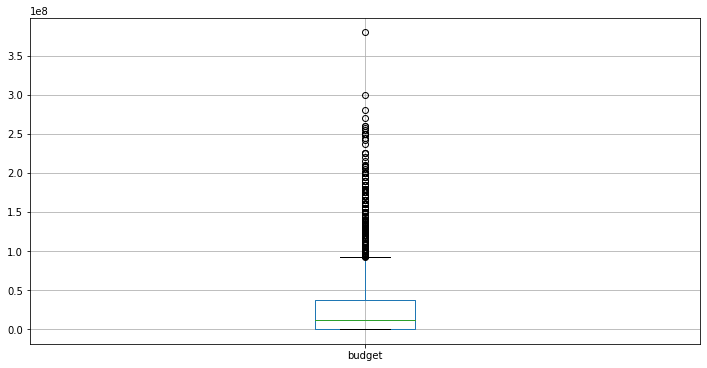

In [348]:
plt.figure(figsize=(12,6))
df.boxplot('budget')
plt.show()

###Genres:

In [349]:
df["genres"].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [350]:
type(df["genres"])

pandas.core.series.Series

In [351]:
df["genres"].dtypes

dtype('O')

###Homepage:

In [352]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

In [353]:
df["homepage"].dtypes

dtype('O')

In [354]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

###Id - identificação dos filmes:

In [355]:
df["id"].head()

0     19995.0
1       285.0
2    206647.0
3     49026.0
4     49529.0
Name: id, dtype: float64

In [356]:
df["id"].dtypes

dtype('float64')

### keywords - Palavras chaves associadas ao filme:


In [357]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [358]:
df["keywords"].dtypes

dtype('O')

###original_language - a língua original do filme:

In [359]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [360]:
df["original_language"].nunique()

38

In [361]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el', 'la'], dtype=object)

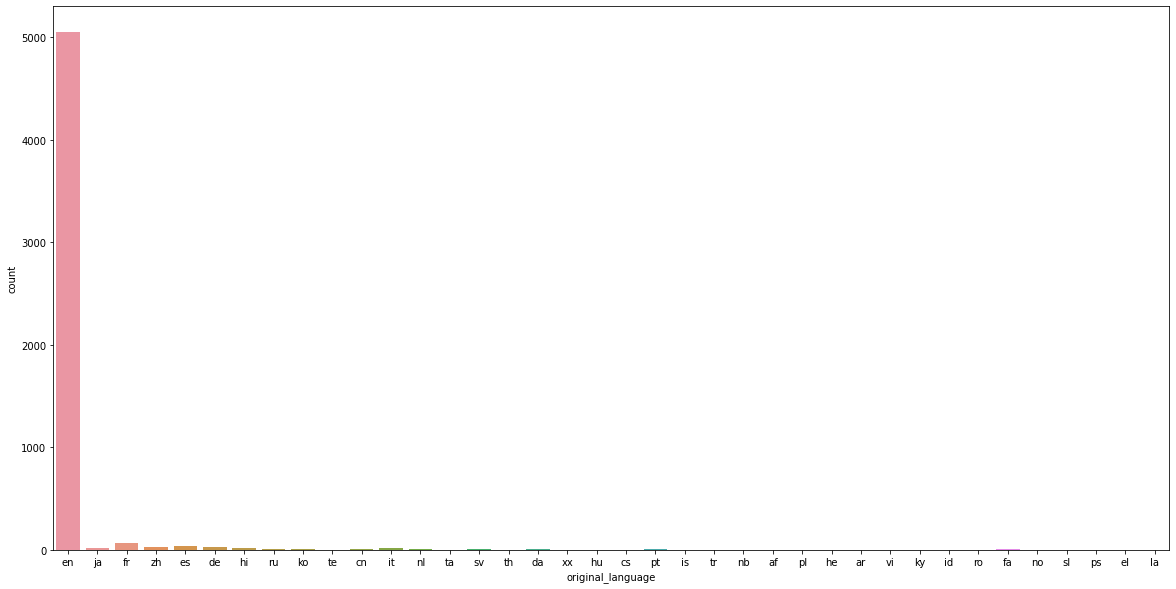

In [362]:
plt.figure(figsize=(20,10))
sns.countplot(x = "original_language", data=df)
plt.show()

In [363]:
df["original_language"].value_counts()

en    5049
fr      72
es      34
zh      27
de      27
hi      19
ja      16
it      15
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ro       2
id       2
ar       2
cs       2
ta       2
tr       1
nb       1
af       1
pl       1
is       1
hu       1
vi       1
ky       1
xx       1
te       1
no       1
sl       1
ps       1
el       1
la       1
Name: original_language, dtype: int64

In [364]:
df["original_language"].describe()

count     5353
unique      38
top         en
freq      5049
Name: original_language, dtype: object

###original_title - Título original dos filmes:

In [365]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [366]:
df["original_title"].dtypes

dtype('O')

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

In [368]:
df["original_title"].nunique()

5329

In [369]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'The Guilty', 'Birds of Paradise', 'After We Fell'],
      dtype=object)

In [370]:
df["original_title"].count()

5353

In [371]:
df["original_title"].describe()

count     5353
unique    5329
top         F9
freq         2
Name: original_title, dtype: object

###Overview - Breve descrição dos filmes:

In [372]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [373]:
df["overview"].nunique()

5340

In [374]:
df["overview"].shape

(5353,)

In [375]:
df["overview"].describe()

count                                                  5350
unique                                                 5340
top       Dr. Lily Houghton enlists the aid of wisecrack...
freq                                                      2
Name: overview, dtype: object

In [376]:
df["overview"].dtypes

dtype('O')

###Popularity - pontuação dada pelo TMDB:

In [377]:
df["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [378]:
df["popularity"].dtypes

dtype('float64')

In [379]:
df["popularity"].describe()

count     5353.000000
mean        36.062382
std        260.475179
min          0.000000
25%          5.251143
50%         14.086292
75%         30.387754
max      13195.451000
Name: popularity, dtype: float64

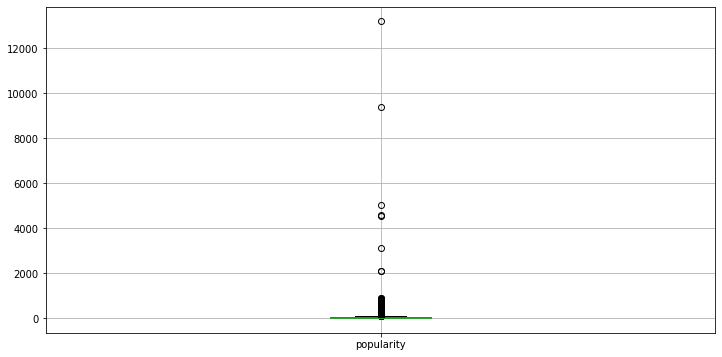

In [380]:
plt.figure(figsize=(12,6))
df.boxplot('popularity')
plt.show()

###Production Companies - Produtoras dos filmes listados:

In [381]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

In [382]:
df["production_companies"].dtypes

dtype('O')

In [383]:
df["production_companies"].describe()

count     5353
unique    4216
top         []
freq       359
Name: production_companies, dtype: object

###Release_date - Data de Lançamento do filme:

In [384]:
df["release_date"].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [385]:
df["release_date"].dtypes

dtype('O')

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

In [387]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5353 non-null   int64         
 1   genres                5353 non-null   object        
 2   homepage              2102 non-null   object        
 3   id                    5353 non-null   float64       
 4   keywords              5353 non-null   object        
 5   original_language     5353 non-null   object        
 6   original_title        5353 non-null   object        
 7   overview              5350 non-null   object        
 8   popularity            5353 non-null   float64       
 9   production_companies  5353 non-null   object        
 10  production_countries  5353 non-null   object        
 11  release_date          5352 non-null   datetime64[ns]
 12  revenue               5353 non-null   int64         
 13  runtime           

In [389]:
df["release_date"].dtypes

dtype('<M8[ns]')

In [390]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    5352
unique                   3566
top       2006-01-01 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2021-12-18 00:00:00
Name: release_date, dtype: object

In [391]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [392]:
df[df["release_date"] == "2021-10-28 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [393]:
df[df["release_date"] == "1913-05-01 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


###Revenue - Receita total do filme (em $):

In [394]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [395]:
df["revenue"].describe().round(2)

count    5.353000e+03
mean     7.710544e+07
std      1.596430e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.410928e+07
75%      8.414683e+07
max      2.787965e+09
Name: revenue, dtype: float64

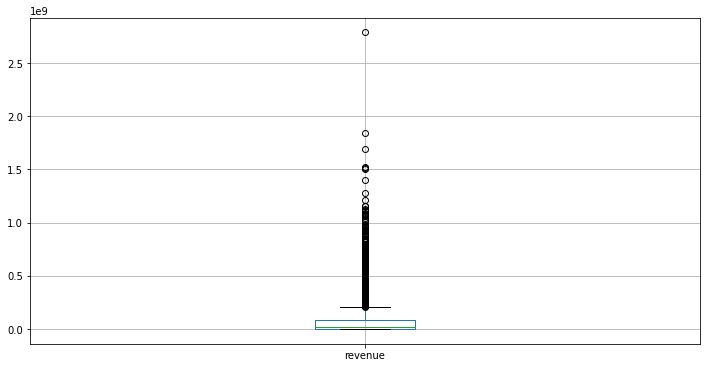

In [396]:
plt.figure(figsize=(12,6))
df.boxplot("revenue")
plt.show()

###Runtime - tempo de execução do filmes em horas e minutos:

In [397]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [398]:
df["runtime"].dtypes

dtype('float64')

In [399]:
df["runtime"].describe()

count    5351.000000
mean      106.528873
std        22.269636
min         0.000000
25%        93.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

In [400]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [401]:
df[df["runtime"] == 338.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434.0,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,"[{""cast_id"": 4, ""character"": ""Ilich Ram\u00edr...","[{""credit_id"": ""57352b61c3a3680253000870"", ""de..."


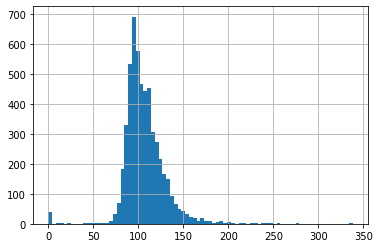

In [402]:
df["runtime"].hist(bins=80)

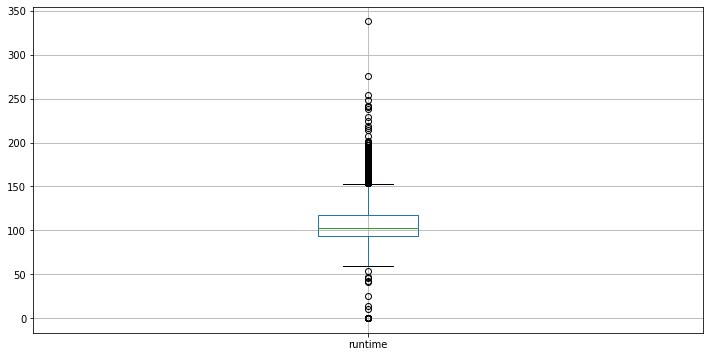

In [403]:
plt.figure(figsize=(12,6))
df.boxplot("runtime")
plt.show()

###Spoken_language - Línguas faladas no filme:

In [404]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [405]:
df["spoken_languages"].dtypes

dtype('O')

###Status - Status do filme (lançado, para ser lançado, anunciado, etc...)

In [406]:
df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [407]:
df["status"].nunique()

3

In [408]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [409]:
df["status"].value_counts()

Released           5345
Rumored               5
Post Production       3
Name: status, dtype: int64

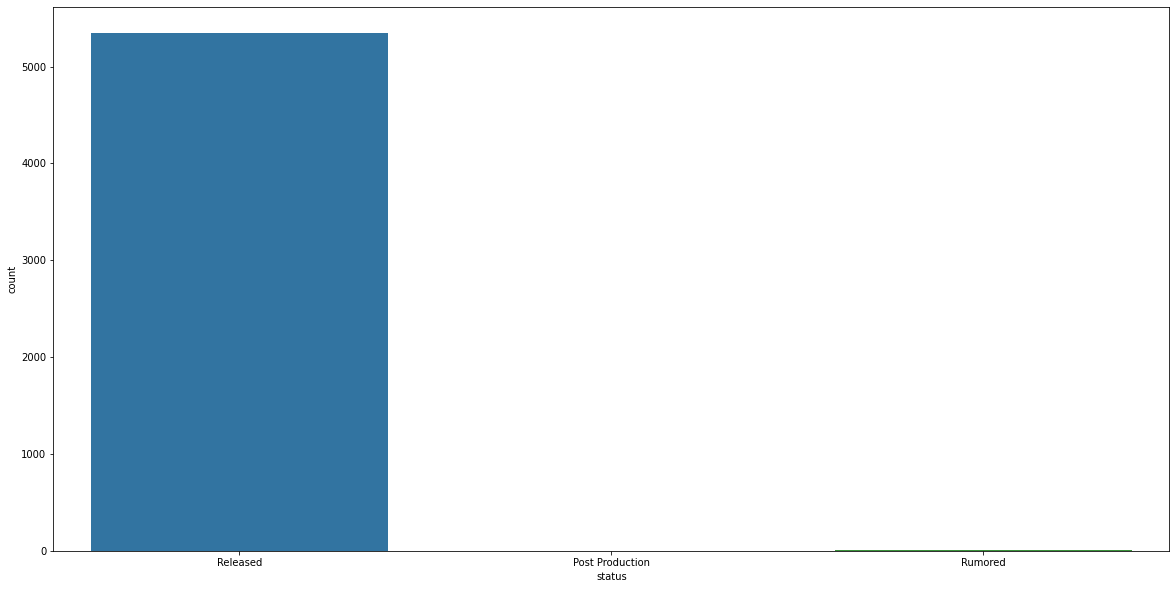

In [410]:
plt.figure(figsize = (20,10))
sns.countplot(x="status", data=df)
plt.show()

###Tagline - Tagline do filme:

In [411]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [412]:
df['tagline'].describe()

count                   4380
unique                  4347
top       Justice is coming.
freq                       3
Name: tagline, dtype: object

Title - Título oficial do Filme:

In [413]:
df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [414]:
df["title"].dtypes

dtype('O')

In [415]:
df["title"].nunique()

5327

In [416]:
df["title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'The Guilty', 'Birds of Paradise', 'After We Fell'],
      dtype=object)

###Vote_average - Avaliação média do filme

In [417]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [418]:
df['vote_average'].dtypes

dtype('float64')

In [419]:
df['vote_average'].describe()

count    5353.000000
mean        6.136391
std         1.198828
min         0.000000
25%         5.600000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

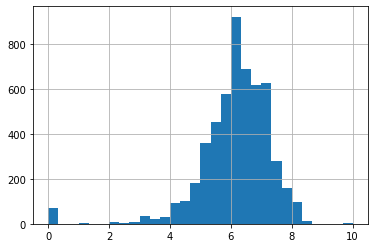

In [420]:
df['vote_average'].hist(bins=30)

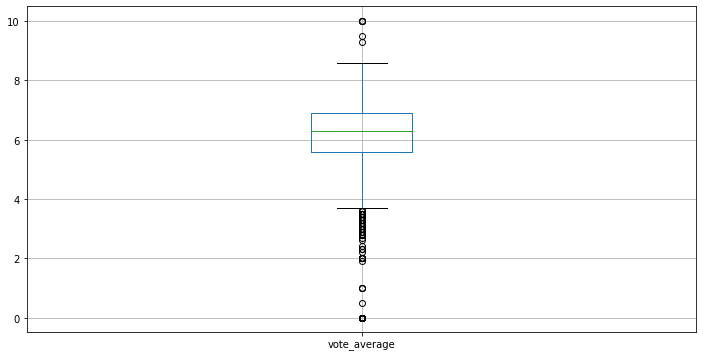

In [421]:
plt.figure(figsize=(12,6))
df.boxplot("vote_average")
plt.show()

In [422]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861.0,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373.0,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505.0,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963.0,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [423]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706.0,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406.0,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027.0,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766.0,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662.0,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,839017.0,[],en,DOMINO: Battle of the Bones,"Hoping to reclaim his former glory, a fallen d...",1.537000,[],[],2021-06-11,0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Domino: Battle Of The Bones,0.0,0,"[{'adult': False, 'gender': 2, 'id': 15234, 'k...","[{'adult': False, 'gender': 2, 'id': 942302, '..."
5230,0,"[{'id': 99, 'name': 'Documentary'}]",http://acrimeonthebayou.com,763040.0,[],en,A Crime on the Bayou,A Crime on the Bayou is the story of Gary Dunc...,1.044000,"[{'id': 152942, 'logo_path': None, 'name': 'Au...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-06-18,0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,A Crime on the Bayou,0.0,0,[],"[{'adult': False, 'gender': 2, 'id': 18747, 'k..."
5288,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.hulu.com/movie/homeroom-3ba54579-2...,776523.0,"[{'id': 3687, 'name': 'graduation'}, {'id': 11...",en,Homeroom,Following the class of 2020 at Oakland High Sc...,3.149000,"[{'id': 125345, 'logo_path': None, 'name': 'Co...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-01-29,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This is not a test.,Homeroom,0.0,0,"[{'adult': False, 'gender': 0, 'id': 3169457, ...","[{'adult': False, 'gender': 2, 'id'

###Vote_count - número de votos contabilizados pelo TMDB:

In [424]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [425]:
df['vote_count'].dtypes

dtype('int64')

In [426]:
df['vote_count'].describe()

count     5353.000000
mean       713.720531
std       1268.053435
min          0.000000
25%         57.000000
50%        240.000000
75%        766.000000
max      13752.000000
Name: vote_count, dtype: float64

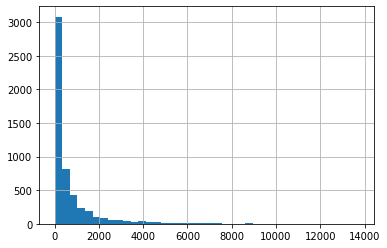

In [427]:
df['vote_count'].hist(bins=40)

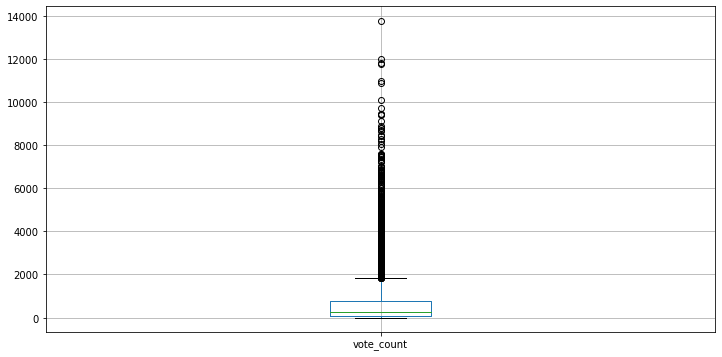

In [428]:
plt.figure(figsize=(12,6))
df.boxplot("vote_count")
plt.show()

In [429]:
df[df["vote_count"] == 22907.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [430]:
q1 = df["vote_count"].quantile(0.25)
q3 = df["vote_count"].quantile(0.75)
IQR = q3 - q1
print(IQR)

709.0


###Cast - Elenco do filme:

In [431]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [432]:
df["cast"].dtypes

dtype('O')

###Crew - Equipe técnica do filme:

In [433]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [434]:
df["crew"].dtypes

dtype('O')

##Analisando e interpretando as features (colunas):

###Análise 1: Qual o retorno de cada filme?

In [435]:
df['budget'] = pd.to_numeric(df["budget"], errors="coerce")
df["budget"] = df["budget"].replace(0, np.nan)

In [436]:
df["return"]  = df["revenue"]/df["budget"]

In [437]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843


In [438]:
df.head().transpose()

,0,1,2,3,4
budget,237000000.0,300000000.0,245000000.0,250000000.0,260000000.0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995.0,285.0,206647.0,49026.0,49529.0
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [439]:
df[df["return"] < 1 ]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
13,255000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201.0,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-03,89289910,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,"[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de...",0.350157
73,175000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",http://www.evanalmighty.com/,2698.0,"[{""id"": 494, ""name"": ""father son relationship""...",en,Evan Almighty,God contacts Congressman Evan Baxter and tells...,27.082182,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-06-09,173000000,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A comedy of biblical proportions,Evan Almighty,5.3,1151,"[{""cast_id"": 19, ""character"": ""Evan Baxter"", ""...","[{""credit_id"": ""52fe4365c3a36847f805145d"", ""de...",0.988571
83,27000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698.0,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de...",0.000000
84,175000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,64686.0,"[{""id"": 233, ""name"": ""japan""}, {""id"": 236, ""na...",en,47 Ronin,"Based on the original 1941 movie from Japan, a...",41.796339,"[{""name"": ""Mid Atlantic Films"", ""id"": 2735}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-12-06,150962475,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,For courage. For loyalty. For honor.,47 Ronin,5.9,1326,"[{""cast_id"": 1001, ""character"": ""Kai"", ""credit...","[{""credit_id"": ""52fe46e4c3a368484e0a98ef"", ""de...",0.862643
135,150000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978.0,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de...",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,20000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,656991.0,"[{'id': 10322, 'name': 'native american'}, {'i...",en,Wild Indian,Decades after covering up his classmate’s murd...,756.260000,"[{'id': 12219, 'logo_path': '/2ddXaM0AHMpAl3tm...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-09-03,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Wild Indian,6.6,17,"[{'adult': False, 'gender': 2, 'id': 154647, '...","[{'adult': False, 'gender': 2, 'id': 44735, 'k...",0.000000
5322,40000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",https://ww

In [440]:
df["return"].describe().round(2)

count       3931.00
mean        2427.25
std       136502.15
min            0.00
25%            0.46
50%            1.82
75%            3.85
max      8500000.00
Name: return, dtype: float64

###Coluna para o ano:

In [441]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3931 non-null   float64       
 1   genres                5353 non-null   object        
 2   homepage              2102 non-null   object        
 3   id                    5353 non-null   float64       
 4   keywords              5353 non-null   object        
 5   original_language     5353 non-null   object        
 6   original_title        5353 non-null   object        
 7   overview              5350 non-null   object        
 8   popularity            5353 non-null   float64       
 9   production_companies  5353 non-null   object        
 10  production_countries  5353 non-null   object        
 11  release_date          5352 non-null   datetime64[ns]
 12  revenue               5353 non-null   int64         
 13  runtime           

In [443]:
df.isnull().sum()

budget                  1422
genres                     0
homepage                3251
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  973
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1422
year                       1
dtype: int64

In [444]:
df[df["year"].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
4553,NaN,[],NaN,380097.0,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaT,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,[],[],NaN,NaN


In [445]:
df.drop(index = 4553, inplace=True)

In [446]:
df.isnull().sum()

budget                  1421
genres                     0
homepage                3250
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  972
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1421
year                       0
dtype: int64

In [447]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0


In [448]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
4238,Modern Times,1936.0,8.500000e+06
3137,Nurse 3-D,2013.0,1.000000e+06
4577,Paranormal Activity,2007.0,1.289039e+04
4582,Tarnation,2003.0,5.330339e+03
4496,The Blair Witch Project,1999.0,4.133333e+03


In [449]:
df['year'] = df['year'].apply(lambda x: int(x))

###Existe algum padrão para palavras que aparecem no título ou no overview?

In [450]:
df["title"] = df["title"].astype("str")

In [451]:
title_corpus = " ".join(df["title"])

In [452]:
print(title_corpus)

Avatar Pirates of the Caribbean: At World's End Spectre The Dark Knight Rises John Carter Spider-Man 3 Tangled Avengers: Age of Ultron Harry Potter and the Half-Blood Prince Batman v Superman: Dawn of Justice Superman Returns Quantum of Solace Pirates of the Caribbean: Dead Man's Chest The Lone Ranger Man of Steel The Chronicles of Narnia: Prince Caspian The Avengers Pirates of the Caribbean: On Stranger Tides Men in Black 3 The Hobbit: The Battle of the Five Armies The Amazing Spider-Man Robin Hood The Hobbit: The Desolation of Smaug The Golden Compass King Kong Titanic Captain America: Civil War Battleship Jurassic World Skyfall Spider-Man 2 Iron Man 3 Alice in Wonderland X-Men: The Last Stand Monsters University Transformers: Revenge of the Fallen Transformers: Age of Extinction Oz: The Great and Powerful The Amazing Spider-Man 2 TRON: Legacy Cars 2 Green Lantern Toy Story 3 Terminator Salvation Furious 7 World War Z X-Men: Days of Future Past Star Trek Into Darkness Jack the Giant 

In [453]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_corpus)

In [454]:
title_wordcloud

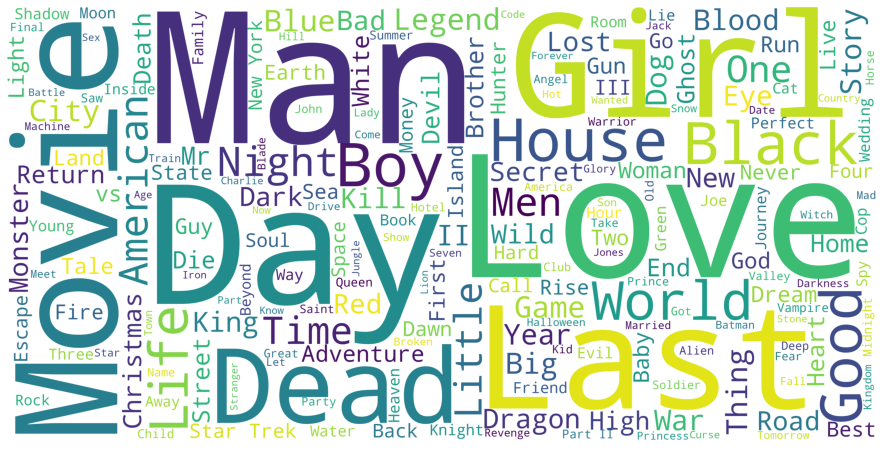

In [455]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

####Overview:

In [456]:
df["overview"] = df["overview"].astype("str")

In [457]:
overview_corpus = " ".join(df["overview"])

In [458]:
print(overview_corpus)

 It's the fictional tale of a wayward 9th grader, Ralph (Adam Butcher), who is secretly living on his own while his widowed, hospitalized mother remains immersed in a coma. Frequently in trouble with Father Fitzpatrick (Gordon Pinsent), the principal of his all-boys, Catholic school, Ralph is considered something of a joke among peers until he decides to pull off a miracle that could save his mother, i.e., winning the Boston Marathon.  Coached by a younger priest and former runner, Father Hibbert (Campbell Scott), whose cynicism has been lifted by the boy's pure hope, Ralph applies himself to his unlikely mission, fending off naysayers and getting help along a very challenging path from sundry allies and friends. Over the course of a midsummer night in Fermanagh in 1890, an unsettled daughter of the Anglo-Irish aristocracy encourages her father's valet to seduce her. Young writer, Richard Collier is met on the opening night of his first play by an old lady who begs him to, "Come back t

In [459]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(overview_corpus)

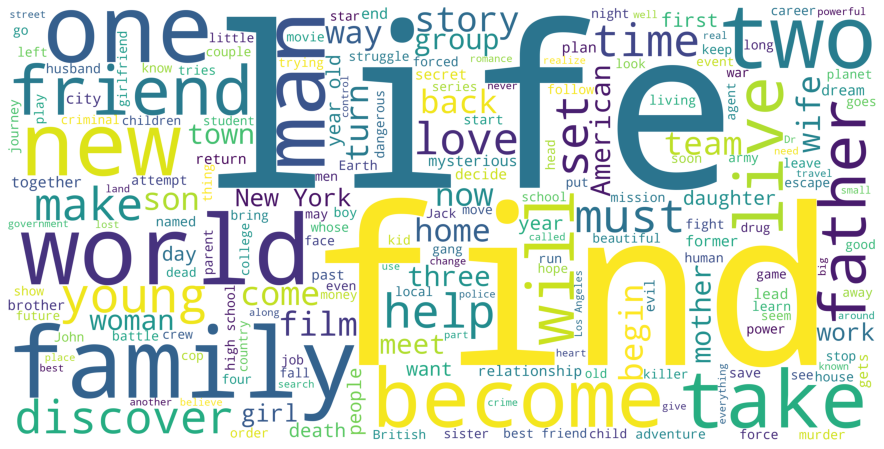

In [460]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

####Quais palavras são usadas em filmes com retorno acima de 5:

In [461]:
df_return = df[df["return"] > 5]

In [462]:
df_return.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009
7,280000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861.0,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",5.019299,2015
12,200000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58.0,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""JM"", ""name"": ""Jamaica""}, {""is...",2006-06-20,1065659812,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,"[{""cast_id"": 37, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""52fe4211c3a36847f8001873"", ""de...",5.328299,2006
16,220000000.0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428.0,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",6.907081,2012
25,200000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597.0,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",9.225171,1997


In [463]:
df_return["title"] = df["title"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [464]:
title_c = " ".join(df_return["title"])

In [465]:
title_wordcloud_return_5 = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_c)

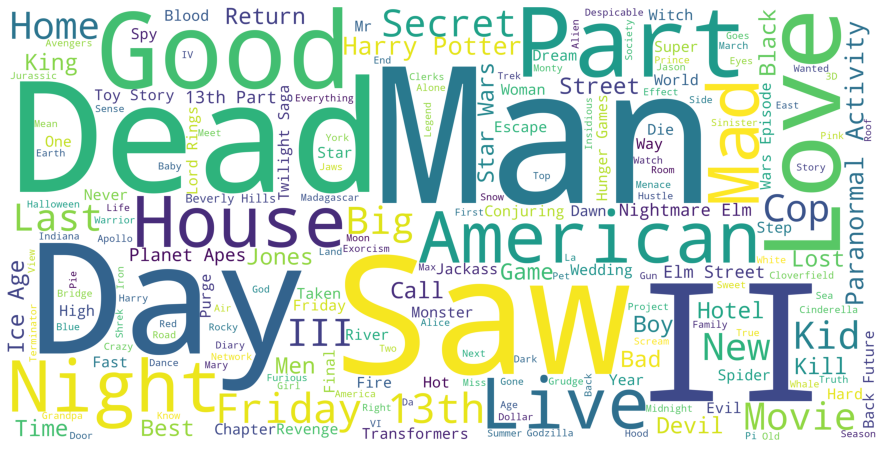

In [466]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud_return_5)
plt.axis('off')
plt.show()

###Quais são os idiomas que mais aparecem?



In [467]:
lang_df = pd.DataFrame(df["original_language"].value_counts())
lang_df["language"] = lang_df.index 
lang_df.columns = ["number", 'language']
lang_df.head()

,number,language
en,5048,en
fr,72,fr
es,34,es
zh,27,zh
de,27,de


In [468]:
df["original_language"].nunique()

38

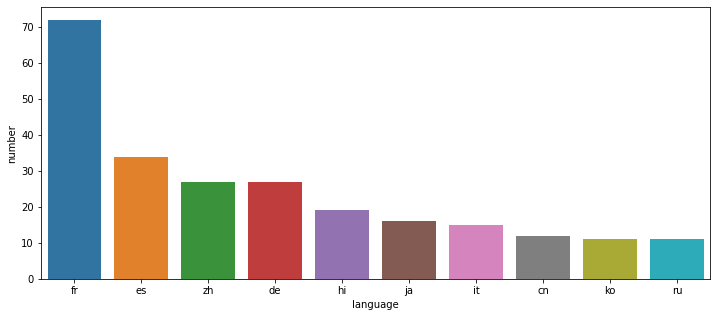

In [469]:
plt.figure(figsize=(12,5))
sns.barplot(x = "language", y = "number", data=lang_df[1:11])

###O que a popularidade nos mostra?

In [470]:
df["popularity"].describe()

count     5352.000000
mean        36.069120
std        260.499050
min          0.000372
25%          5.253661
50%         14.092622
75%         30.390190
max      13195.451000
Name: popularity, dtype: float64

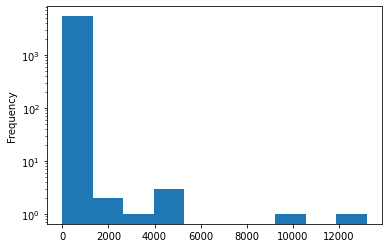

In [471]:
df["popularity"].plot(logy=True, kind='hist')

In [472]:
df[["original_title", "popularity", "year"]].sort_values("popularity", ascending=False).head(20)

,original_title,popularity,year
5076,Spider-Man: No Way Home*,13195.451000,2021
5081,Eternals,9373.581000,2021
5090,Encanto*,5036.143000,2021
5085,Sing 2*,4593.267000,2021
5084,Ghostbusters: Afterlife*,4555.726000,2021
5078,Venom: Let There Be Carnage,3103.826000,2021
5077,Shang-Chi and the Legend of the Ten Rings,2070.184000,2021
5314,Shang-Chi and the Legend of the Ten Rings,2070.184000,2021
546,Minions,875.581305,2015
5245,The Boss Baby: Family Business,874.796000,2021


###O que a contagem de votos nos mostra?

In [473]:
df[["title", 'vote_count', 'year']].sort_values("vote_count", ascending=False).head(10)

,title,vote_count,year
96,Inception,13752,2010
65,The Dark Knight,12002,2008
0,Avatar,11800,2009
16,The Avengers,11776,2012
788,Deadpool,10995,2016
95,Interstellar,10867,2014
287,Django Unchained,10099,2012
94,Guardians of the Galaxy,9742,2014
426,The Hunger Games,9455,2012
127,Mad Max: Fury Road,9427,2015


#### E a média dos votos?

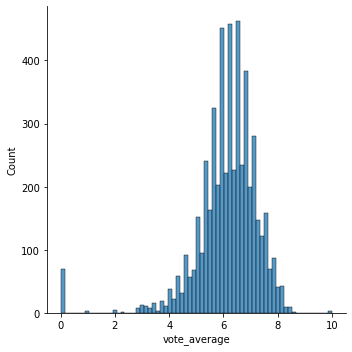

In [474]:
sns.displot(df['vote_average'].fillna(df['vote_average'].median()))

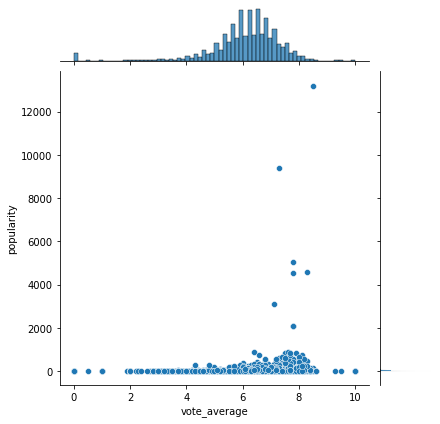

In [475]:
sns.jointplot(x='vote_average', y="popularity", data=df)

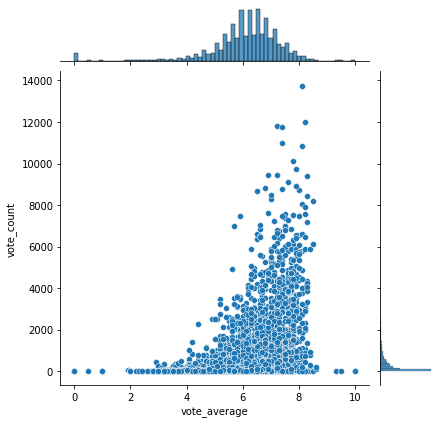

In [476]:
sns.jointplot(x='vote_average', y="vote_count", data=df)

###Quais meses os filmes são mais lançados?

In [477]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012


In [478]:
df['month'] = pd.DatetimeIndex(df["release_date"]).month

In [479]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009,12
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007,5
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015,10
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012,7
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012,3


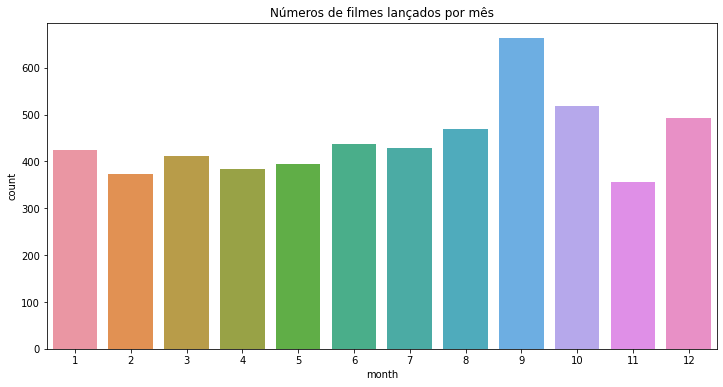

In [480]:
plt.figure(figsize=(12,6))
plt.title("Números de filmes lançados por mês")
sns.countplot(x="month", data=df)

(0.0, 12.0)

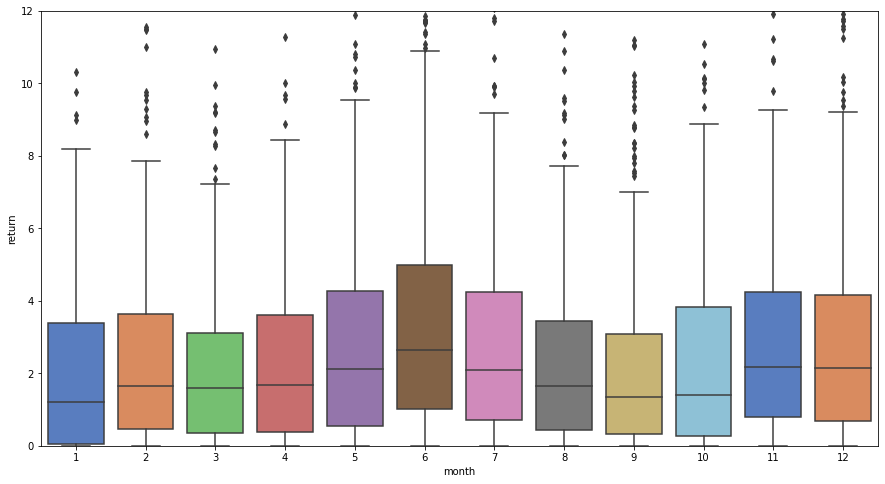

In [481]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.boxplot(x="month", y='return', data=df[df["return"].notnull()], palette="muted", ax=ax)
ax.set_ylim([0, 12])

###Quantos filmes foram lançados por ano?

In [482]:
year_count = df.groupby('year')["original_title"].count()

In [483]:
year_count

year
1916      1
1925      1
1927      1
1929      2
1930      1
       ... 
2017      6
2018      6
2019     23
2020    253
2021    246
Name: original_title, Length: 94, dtype: int64

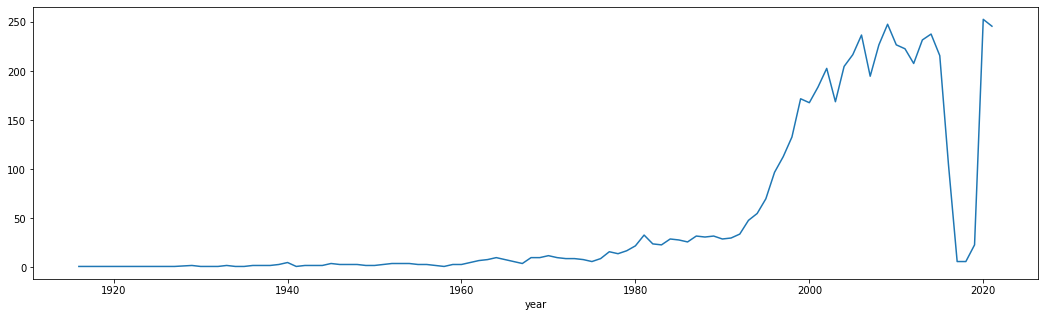

In [484]:
plt.figure(figsize=(18,5))
year_count.plot()

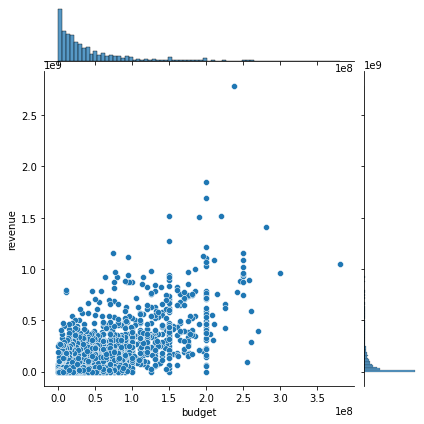

In [485]:
sns.jointplot(x='budget', y="revenue", data=df[df["return"].notnull()])

###Sistema de implementação:


####Filtragem demográfica:

In [486]:
C = df["vote_average"].mean()

In [487]:
m = df["vote_count"].quantile(0.9)

In [488]:
q_movies = df.copy().loc[df["vote_count"] >= m]

In [489]:
q_movies.shape

(536, 25)

In [490]:
df.shape

(5352, 25)

In [491]:
def wr(dataframe, m=m, C=C):
  v = dataframe["vote_count"]
  R = dataframe["vote_average"]
  return (v/(v+m) * R) + (m/(v+m) * C)

In [492]:
q_movies["score"] = q_movies.apply(wr, axis=1)

In [493]:
q_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year,month,score
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009,12,7.051470
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007,5,6.672165
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015,10,6.251195
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012,7,7.345588
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012,3,6.117811


In [494]:
q_movies[["title","vote_count", "vote_average", "score"]].head()

,title,vote_count,vote_average,score
0,Avatar,11800,7.2,7.051470
1,Pirates of the Caribbean: At World's End,4500,6.9,6.672165
2,Spectre,4466,6.3,6.251195
3,The Dark Knight Rises,9106,7.6,7.345588
4,John Carter,2124,6.1,6.117811


In [495]:
q_movies = q_movies.sort_values("score", ascending=False)

#### Usando a similiaridade:

In [496]:
df_movies = df[['id','title','overview','genres','keywords','cast','crew']]

In [497]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [498]:
df_movies.isnull().sum()

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [499]:
df_movies.shape

(5352, 7)

##Função de transformação:

In [500]:
def transform(t):
  lista_t = []
  for i in ast.literal_eval(t):
    lista_t.append(i["name"])
  return lista_t

In [501]:
df_movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [502]:
df_movies["genres"] = df_movies["genres"].apply(transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [503]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [504]:
df_movies["keywords"] = df_movies["keywords"].apply(transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [505]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [506]:
df_movies["cast"] = df_movies["cast"].apply(transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [507]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [508]:
def find_director(t):
  lista_t = []
  for i in ast.literal_eval(t):
    if i["job"] == "Director":
      lista_t.append(i["name"])
  return lista_t

In [509]:
df_movies["crew"] = df_movies["crew"].apply(find_director)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [510]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [511]:
def replace_empty(l):
  lista_replace_t = []
  for i in l:
    lista_replace_t.append(i.replace(" ", ""))
  return lista_replace_t

In [512]:
df_movies["cast"] = df_movies["cast"].apply(replace_empty)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [513]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[James Cameron]
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[Gore Verbinski]
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[Sam Mendes]
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[Christopher Nolan]
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[Andrew Stanton]


In [514]:
df_movies["crew"] = df_movies["crew"].apply(replace_empty)
df_movies["genres"] = df_movies["genres"].apply(replace_empty)
df_movies["keywords"] = df_movies["keywords"].apply(replace_empty)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [515]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529.0,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [516]:
df_movies["overview"] = df["overview"].apply(lambda i:i.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [517]:
df_movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995.0,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285.0,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647.0,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026.0,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529.0,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [518]:
df_movies["tags"] = df_movies["overview"] + df_movies["genres"] + df_movies["keywords"] + df_movies["cast"] + df_movies["crew"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [519]:
df_movies

,id,title,overview,genres,keywords,cast,crew,tags
0,19995.0,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285.0,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647.0,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026.0,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529.0,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
5348,597316.0,My Little Pony: A New Generation,"[Equestria's, divided., But, a, bright-eyed, h...","[Animation, Family, Fantasy, Comedy, Music, Ad...","[flyinghorse, pony, unicorn]","[VanessaHudgens, KimikoGlenn, JamesMarsden, So...","[JoséLuisUcha, MarkFattibene, RobertCullen]","[Equestria's, divided., But, a, bright-eyed, h..."
5349,567690.0,Dear Evan Hansen,"[Evan, Hansen,, a, high, schooler, with, socia...",[Drama],"[suicide, autism, letter, musical, highschool,...","[BenPlatt, KaitlynDever, AmyAdams, DannyPino, ...",[StephenChbosky],"[Evan, Hansen,, a, high, schooler, with, socia..."
5350,567748.0,The Guilty,"[A, demoted, police, officer, assigned, to, a,...","[Drama, Thriller]","[remake, psychologicalthriller, policeofficer,...","[JakeGyllenhaal, EthanHawke, RileyKeough, Pete...",[AntoineFuqua],"[A, demoted, police, officer, assigned, to, a,..."
5351,667969.0,Birds of Paradise,"[Two, dancers, at, an, elite, ballet, academy,...",[Drama],"[dance, mask, dancecompetition, ballet, ballet...","[DianaSilvers, KristineFroseth, EvaLomby, Jacq...",[SarahAdinaSmith],"[Two, dancers, at, an, elite, ballet, academy,..."


In [520]:
df3 = df_movies.drop(columns=["overview", "genres", "keywords", "cast", "crew"])

In [521]:
df3.head()

,id,title,tags
0,19995.0,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285.0,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647.0,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026.0,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529.0,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [522]:
df3['tags'] = df3['tags'].apply(lambda i: " ".join(i))

In [523]:
df3.head()

,id,title,tags
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529.0,John Carter,"John Carter is a war-weary, former military ca..."


In [524]:
vectorizer = CountVectorizer(max_features=5000, stop_words="english")

In [525]:
vectorizer

CountVectorizer(max_features=5000, stop_words='english')

In [526]:
X = vectorizer.fit_transform(df3["tags"]).toarray()

In [527]:
X.shape

(5352, 5000)

In [528]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [529]:
similarity = cosine_similarity(X)

In [530]:
similarity

array([[1.        , 0.0722944 , 0.05143445, ..., 0.        , 0.        ,
        0.02817181],
       [0.0722944 , 1.        , 0.07808688, ..., 0.        , 0.        ,
        0.05702659],
       [0.05143445, 0.07808688, 1.        , ..., 0.        , 0.        ,
        0.03042903],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.04279605,
        0.03984095],
       [0.        , 0.        , 0.        , ..., 0.04279605, 1.        ,
        0.03580574],
       [0.02817181, 0.05702659, 0.03042903, ..., 0.03984095, 0.03580574,
        1.        ]])

In [531]:
df3.head(10)

,id,title,tags
0,19995.0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647.0,Spectre,A cryptic message from Bond’s past sends him o...
3,49026.0,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529.0,John Carter,"John Carter is a war-weary, former military ca..."
5,559.0,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...
6,38757.0,Tangled,When the kingdom's most wanted-and most charmi...
7,99861.0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...
8,767.0,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he..."
9,209112.0,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...


In [532]:
df3[df3['title'] == "Spectre"].index[0]

2

In [533]:
def sistema_recomendacao(movie):
  index = df3[df3["title"] == movie].index[0]
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
  for i in distance[1:6]:
    print(df3.iloc[i[0]].title)

In [534]:
sistema_recomendacao("Avatar")

Skylines
Battle: Los Angeles
Aliens vs Predator: Requiem
Titan A.E.
Lifeforce


In [537]:
sistema_recomendacao("Avengers: Age of Ultron")

The Avengers
Captain America: Civil War
Iron Man 3
Iron Man
Iron Man 2


In [535]:
pickle.dump(df3, open('lista_filmes.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))